# Import Model and Data in loaders

In [1]:
import os
from pathlib import Path
p = Path.cwd().resolve()
while p != p.parent and not (p / 'requirements.txt').exists() and not (p / 'data').exists():
    p = p.parent

os.chdir(str(p/"src"))

from model import SmallCNN
from data import build_dataloaders

model = SmallCNN()

train_loader0, val_loader0, test_loader0, meta0 = build_dataloaders(data_root=os.path.join(p, 'data'), size=128, batch_size=64, augmentationTier=0)
train_loader1, val_loader1, test_loader1, meta1 = build_dataloaders(data_root=os.path.join(p, 'data'), size=128, batch_size=64, augmentationTier=1)
train_loader2, val_loader2, test_loader2, meta2 = build_dataloaders(data_root=os.path.join(p, 'data'), size=128, batch_size=64, augmentationTier=2)
train_loader3, val_loader3, test_loader3, meta3 = build_dataloaders(data_root=os.path.join(p, 'data'), size=128, batch_size=64, augmentationTier=3)
model_out = os.path.join(p, 'experiments')

Discovered 21710 samples in 10 classes.
Augmentation Tier 0 - Train/val/test split: 17380/2165/2165
Discovered 21710 samples in 10 classes.
Augmentation Tier 1 - Train/val/test split: 17380/2165/2165
Discovered 21710 samples in 10 classes.
Augmentation Tier 2 - Train/val/test split: 17380/2165/2165
Discovered 21710 samples in 10 classes.
Augmentation Tier 3 - Train/val/test split: 17380/2165/2165


# TRAIN THE MODEL

#### Baseline (Augmentation Tier 0)

In [2]:
from train import train_x_epoch
import torch

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = None

val_losses0, val_accuracies0, train_losses0 = train_x_epoch(
    model, train_loader0, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader0, seed=67, augTier=0
)

Epoch 1/5  lr=0.001000
0% - Batch 1/272  loss: 2.3246  acc: 1.56%  lr: 0.001000
20% - Batch 55/272  loss: 1.9777  acc: 30.03%  lr: 0.001000
40% - Batch 109/272  loss: 1.8694  acc: 34.29%  lr: 0.001000
59% - Batch 163/272  loss: 1.8127  acc: 36.49%  lr: 0.001000
79% - Batch 217/272  loss: 1.7752  acc: 38.23%  lr: 0.001000
99% - Batch 271/272  loss: 1.7426  acc: 39.60%  lr: 0.001000
Validation Results:
Average Loss: 1.6047, Accuracy: 45.64%
Model checkpoint saved to ../experiments/checkpoints/model_epoch_best_Tier0.pth
Epoch 2/5  lr=0.001000
0% - Batch 1/272  loss: 1.6415  acc: 56.25%  lr: 0.001000
20% - Batch 55/272  loss: 1.5818  acc: 46.05%  lr: 0.001000
40% - Batch 109/272  loss: 1.5884  acc: 46.46%  lr: 0.001000
59% - Batch 163/272  loss: 1.5806  acc: 47.00%  lr: 0.001000
79% - Batch 217/272  loss: 1.5698  acc: 47.18%  lr: 0.001000
99% - Batch 271/272  loss: 1.5590  acc: 47.70%  lr: 0.001000
Validation Results:
Average Loss: 1.5460, Accuracy: 48.18%
Model checkpoint saved to ../expe

#### Comparison (Augmentation Tier 1)

In [ ]:
val_losses1, val_accuracies1, train_losses1 = train_x_epoch(
    model, train_loader1, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader1, seed=67, augTier=1
)

#### Comparison (Augmentation Tier 2)

In [ ]:
val_losses2, val_accuracies2, train_losses2 = train_x_epoch(
    model, train_loader2, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader2, seed=67, augTier=2
)

#### Comparison (Augmentation Tier 3)

In [ ]:
val_losses3, val_accuracies3, train_losses3 = train_x_epoch(
    model, train_loader3, criterion=criterion, optimizer=optimizer, epochs=5, scheduler=scheduler, val_loader=val_loader3, seed=67, augTier=3
)

# Plotting Loss and Accuracies

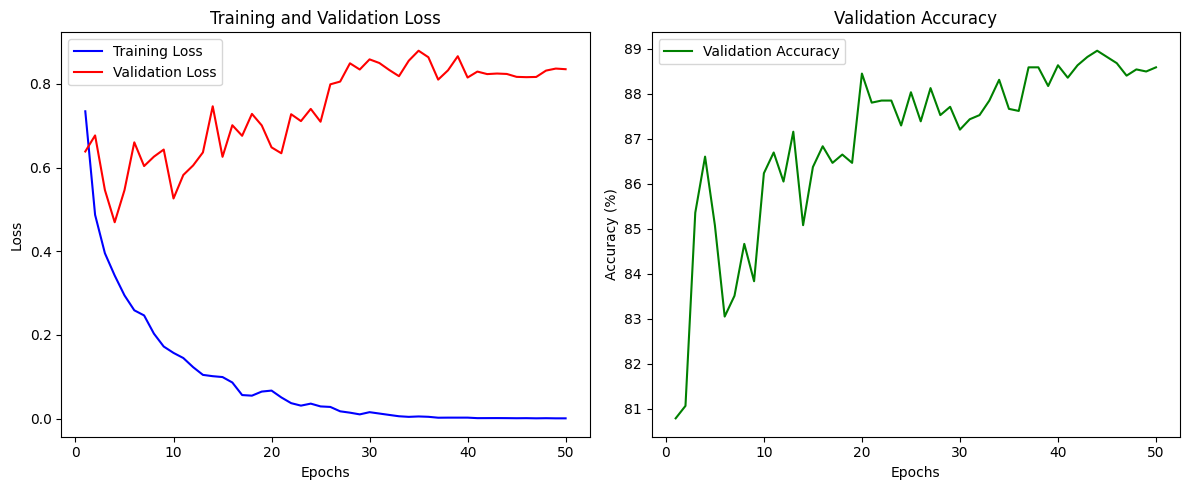

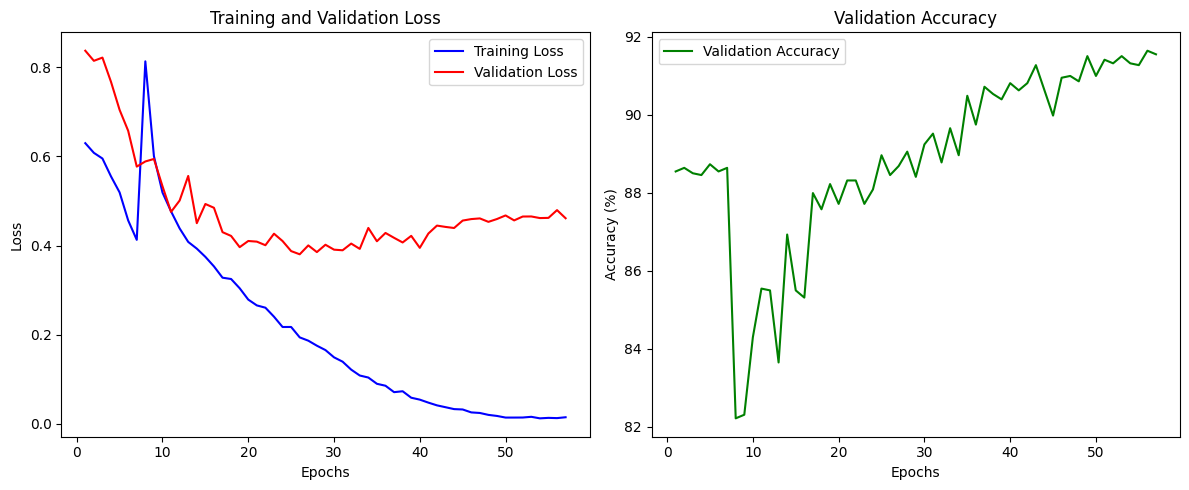

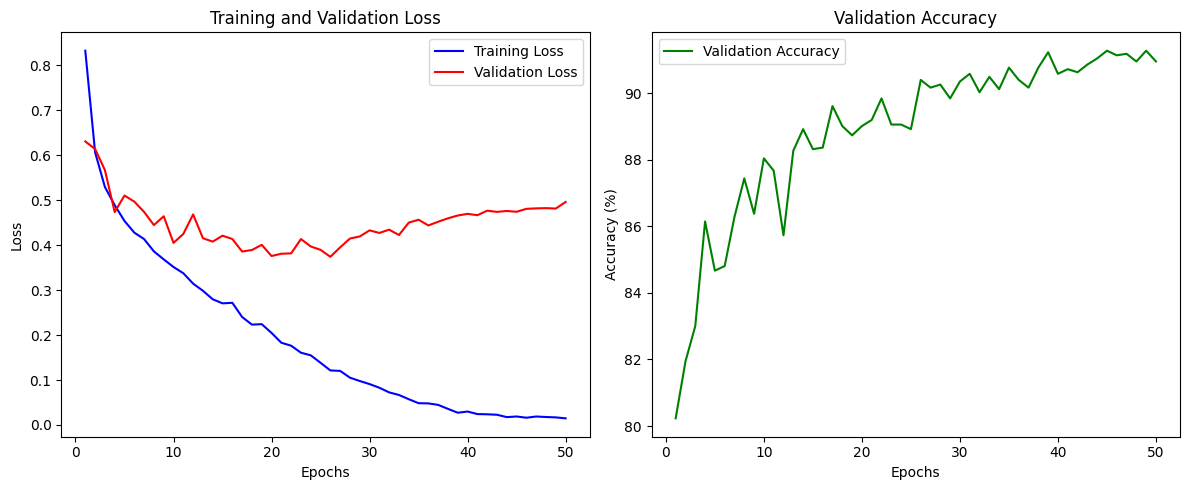

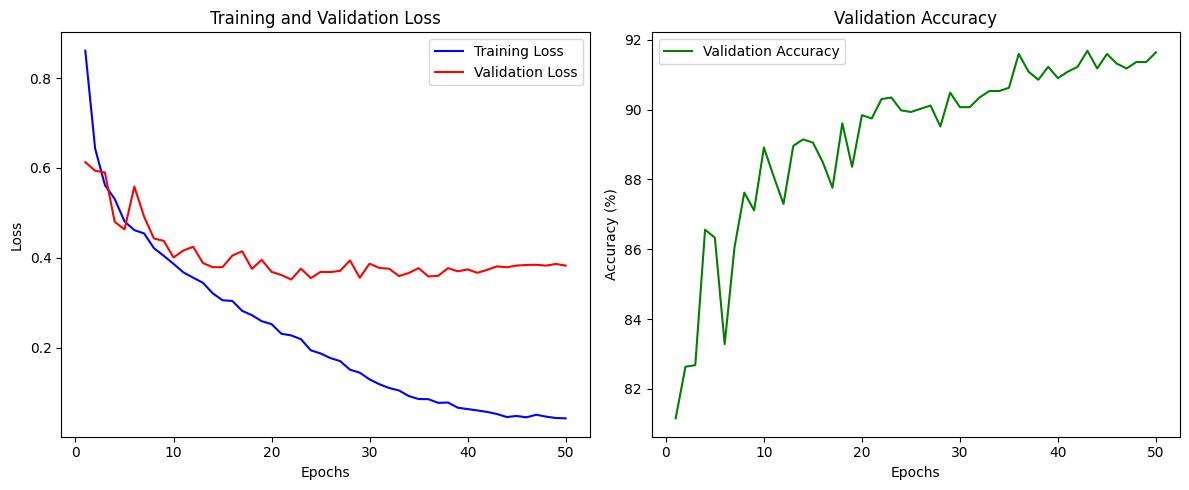

Final Evaluation on Validation Set:


NameError: name 'criterion' is not defined

In [3]:
from utils import plot, plot_from_csv
from eval import evaluateClassAccurracy

plot_from_csv(source='../experiments/logs/training_log_Tier0.csv', dest='../plots/aug_tier_0.png')
plot_from_csv(source='../experiments/logs/training_log_Tier1.csv', dest='../plots/aug_tier_1.png')
plot_from_csv(source='../experiments/logs/training_log_Tier2.csv', dest='../plots/aug_tier_2.png')
plot_from_csv(source='../experiments/logs/training_log_Tier3.csv', dest='../plots/aug_tier_3.png')

print("Final Evaluation on Validation Set:")
evaluateClassAccurracy(model, test_loader0, criterion, 10)